# DS-SF-36 | Unit Project | 2 | Exploratory Data Analysis | Starter Code

In this project, you will implement the exploratory analysis plan developed in Unit Project 1.  This will lay the groundwork for our modeling exercise in Unit Project 3.

First, load the python libraries you will need for this project:

In [35]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.stats as stats


pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.notebook_repr_html', True)

%matplotlib inline
plt.style.use('ggplot')

Then, read in your dataset:

In [2]:
df = pd.read_csv(os.path.join('..', '..', 'dataset', 'dataset-ucla-admissions.csv'))

df

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
...,...,...,...,...
395,0,620.0,4.00,2.0
396,0,560.0,3.04,3.0
397,0,460.0,2.63,2.0
398,0,700.0,3.65,2.0


## Questions

> ### Question 1.  How many observations are in our dataset?

In [7]:
# TODO
df.shape

(400, 4)

Answer: 400

> ### Question 2.  Create a summary table.

In [5]:
# TODO
df.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


> ### Question 3.  Why would `gre` have a larger variance than `gpa`?

In [ ]:
# TODO

Answer: GRE is a standardized test across schools and programs that is fit to a normal distribution and the variance is pre-defined. The GPA, however, is not standardized  however is not standarzied across various programs. Some programs may have higher GPAs on average while others lower. There could be grade inflation at some schools. 

> ### Question 4.  Drop data points with missing data.

In [11]:
# TODO

df = df.dropna()


,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
...,...,...,...,...
395,0,620.0,4.00,2.0
396,0,560.0,3.04,3.0
397,0,460.0,2.63,2.0
398,0,700.0,3.65,2.0


> ### Question 5.  Confirm that you dropped the correct data.  How can you tell?

In [18]:
# TODO
df[pd.isnull(df).any(axis=1)]


,admit,gre,gpa,prestige


Answer: TODO

> ### Question 6.  Create boxplots for `gre` and `gpa`.

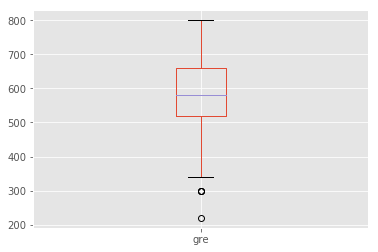

In [19]:
# TODO
df.gre.plot(kind='box')

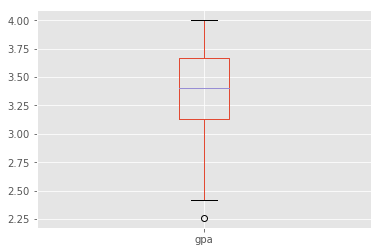

In [21]:
# TODO
df.gpa.plot(kind='box')

> ### Question 7.  What do boxplots show?

Answer: 

box plots show the total range of the dataset, the interquartile ranges as well as the median for one or more variables

> ### Question 8.  Plot the distribution of each variable.

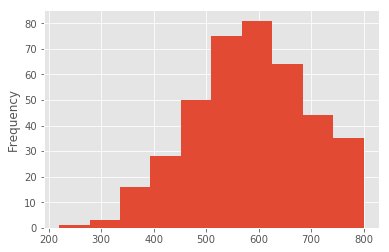

In [25]:
# TODO
df.gre.plot(kind ='hist')

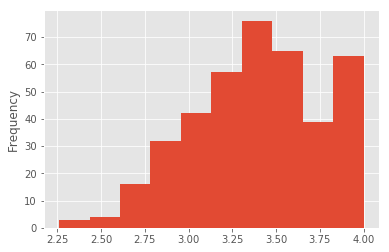

In [26]:
# TODO
df.gpa.plot(kind ='hist')

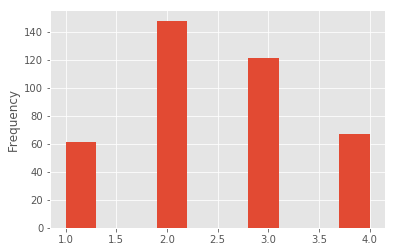

In [56]:
# TODO
df.prestige.plot(kind ='hist')

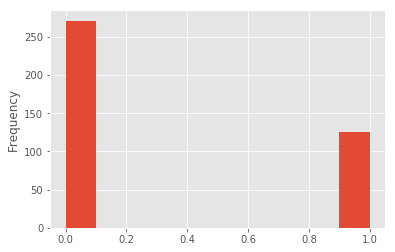

In [55]:
# TODO
df.admit.plot(kind ='hist')

> ### Question 9.  If our model had an assumption of a normal distribution for `gre` and `gpa`, would we meet that requirement?  Would their distributions need correction?  If so, why, why not?  How?

In [48]:
# TODO
# Using the Kolmogorov Smirnov Test
gre_normality = stats.diagnostic.kstest_normal(df.gre,pvalmethod='approx')
gre_normality


(0.045167591938338525, 0.050253120949579143)

In [49]:
# TODO
gpa_normality = stats.diagnostic.kstest_normal(df.gpa,pvalmethod='approx')
gpa_normality

(0.054967267239482975, 0.0058738784318525918)

Answer: The p value for gre distribution is above the threshold of 0.05. We can therefore accept the Null hypothesis that the sample comes from a normal distribution. For GPA, however, we would refect the null hypothesis that the sample comes from a null hypothesis. 

> ### Question 10.  Create a correlation matrix for the dataset.

             admit       gre       gpa  prestige
admit     1.000000  0.181202  0.174116 -0.243563
gre       0.181202  1.000000  0.382408 -0.124533
gpa       0.174116  0.382408  1.000000 -0.060976
prestige -0.243563 -0.124533 -0.060976  1.000000


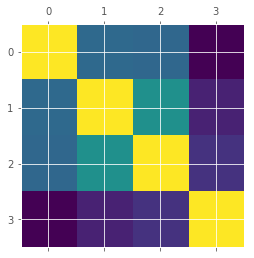

In [54]:
# TODO

corr = df.corr()

print (corr)

plt.matshow(corr)

> ### Question 11.  What did you find?  Which of our variables are potentially colinear?

Answer: 

GRE and GPA have a correlation coefficient of 0.38 which means they have a weak to moderate level of positive relationship. Prestige has a weak negative relationship with GRE and GPA. None of them are strong enough that we need to remove them

> ### Question 12.  Write an analysis plan for exploring the association between graduate school admission rates and prestige of undergraduate schools.

Answer: TODO

Research Question: Does prestige of the undergraduate school predict admission into graduate school?

Plan: To examine the research question, a linear regression will be conducted whether or not prestige of the undergraduate school predicts admission into graduate school. A linear regression is an appropriate analysis when the goal of research is to assess the extent of the relationship between a interval variable with another interval/binary variable. In this case, prestige is the independent variable and admit rate is the dependent variable. The following regression equation will be used: y = b*x + c, where y = estimated dependent variable, c = constant, b = regression coefficient and x = independent variable. The F-test will be used to determine whether the independent variable predicts the dependent variable. R-squared will be reported and used to determine how much variance in the dependent variable can be accounted for by the independent variable. The t-test will be used to determine the significance of the predictor and beta coefficients will be used to determine the magnitude of the relationship. 


> ### Question 13.  What is your hypothesis?